In [2]:
# GPU setting
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import os
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.models import Model
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # 這是 2 顆都用，可以先觀察現在 GPU 情況再決定要用哪顆
#gpu_options = tf.GPUOptions(allow_growth=True)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.1)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
set_session(sess)

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#sat & mask
filepath = '../data/hw3_dataset/train/'
sat_list = [file for file in os.listdir(filepath) if file.endswith('.jpg')]
mask_list = [file for file in os.listdir(filepath) if file.endswith('.png')]
sat_list.sort()
mask_list.sort()
n_sats   = len(sat_list)
n_masks = len(mask_list)

def read_img(filelist,filepath, n_imgs, h, w, d):
    data = np.empty((n_imgs, h, w, d))
    for i, file in enumerate(filelist):
        data[i] = mpimg.imread(os.path.join(filepath, file))
    return data
                               
sat = read_img(sat_list, filepath, n_sats, 512, 512, 3)/255
mask = read_img(mask_list, filepath, n_masks, 512, 512, 3)


In [3]:
mask = (mask >= 128).astype(int)
mask = 4 * mask[:, :, :, 0] + 2 * mask[:, :, :, 1] + mask[:, :, :, 2]

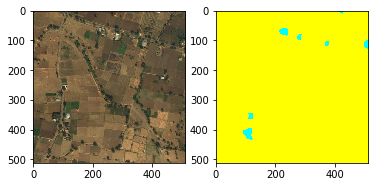

In [5]:
plt.subplot(1,2,1)
plt.imshow(sat[0])
plt.subplot(1,2,2)
plt.imshow(mask[0])

In [6]:
img_input = Input(shape=(512,512,3))
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

model = Model(img_input, x)
weights_path = '../data/hw3_dataset/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
model.load_weights(weights_path, by_name=True)

In [8]:
x = model.layers[-1].output
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='FCN_conv1')(x)
model2 = Model(input=img_input, output=x)
for i in range(len(model2.layers)):
    print(model2.layers[i].output)

Tensor("input_1:0", shape=(?, 512, 512, 3), dtype=float32)
Tensor("block1_conv1/Relu:0", shape=(?, 512, 512, 64), dtype=float32)
Tensor("block1_conv2/Relu:0", shape=(?, 512, 512, 64), dtype=float32)
Tensor("block1_pool/MaxPool:0", shape=(?, 256, 256, 64), dtype=float32)
Tensor("block2_conv1/Relu:0", shape=(?, 256, 256, 128), dtype=float32)
Tensor("block2_conv2/Relu:0", shape=(?, 256, 256, 128), dtype=float32)
Tensor("block2_pool/MaxPool:0", shape=(?, 128, 128, 128), dtype=float32)
Tensor("block3_conv1/Relu:0", shape=(?, 128, 128, 256), dtype=float32)
Tensor("block3_conv2/Relu:0", shape=(?, 128, 128, 256), dtype=float32)
Tensor("block3_conv3/Relu:0", shape=(?, 128, 128, 256), dtype=float32)
Tensor("block3_pool/MaxPool:0", shape=(?, 64, 64, 256), dtype=float32)
Tensor("block4_conv1/Relu:0", shape=(?, 64, 64, 512), dtype=float32)
Tensor("block4_conv2/Relu:0", shape=(?, 64, 64, 512), dtype=float32)
Tensor("block4_conv3/Relu:0", shape=(?, 64, 64, 512), dtype=float32)
Tensor("block4_pool/Max

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("FC...)`
  This is separate from the ipykernel package so we can avoid doing imports until
